In [327]:
import numpy as np
import pandas as pd
training = pd.read_csv("train.csv")
income = pd.read_csv("income.csv")
training = pd.merge(training, income, 'inner')

In [328]:
#Add features 
training['TotalSF'] = (training['1stFlrSF'] + training['2ndFlrSF'] + training['TotalBsmtSF'])
training['Age'] = 2010 - training['YearBuilt']

In [329]:
#View Correlation Matrix
#print(corr_matrix['SalePrice'].sort_values(ascending = False))
variances = np.var(training, 0)
print(variances[variances > 1].sort_values(ascending = False))

SalePrice        6.292922e+09
Income           2.121492e+08
LotArea          9.914882e+07
TotalSF          6.777819e+05
GrLivArea        2.773504e+05
MiscVal          2.478223e+05
BsmtFinSF1       2.062330e+05
BsmtUnfSF        1.956400e+05
TotalBsmtSF      1.924658e+05
2ndFlrSF         1.909395e+05
Id               1.774305e+05
1stFlrSF         1.496561e+05
GarageArea       4.588605e+04
MasVnrArea       3.289200e+04
BsmtFinSF2       2.473435e+04
WoodDeckSF       1.534581e+04
OpenPorchSF      4.401430e+03
EnclosedPorch    3.757644e+03
ScreenPorch      3.052226e+03
LowQualFinSF     2.380259e+03
MSSubClass       1.788000e+03
PoolArea         1.625298e+03
YearBuilt        9.170843e+02
Age              9.170843e+02
3SsnPorch        8.653487e+02
GarageYrBlt      6.134044e+02
LotFrontage      5.887901e+02
YearRemodAdd     4.282859e+02
MoSold           7.313735e+00
TotRmsAbvGrd     2.647043e+00
OverallQual      1.910315e+00
YrSold           1.766779e+00
OverallCond      1.233361e+00
dtype: flo

In [330]:
#Turning Central Air to Numeric
CentralAir = training['CentralAir']
CentralAir_cat_encoded, CentralAir_Categories = CentralAir.factorize()
CentralAir_Num = pd.DataFrame(CentralAir_cat_encoded)
training['CentralAir'] =  CentralAir_Num

In [331]:
#Normalizing and Standardizing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.MinMaxScaler()
training['FullBath_Norm'] = scaler.fit_transform(training[["FullBath"]])
scaler = preprocessing.StandardScaler()
training['FullBath_Stand'] = scaler.fit_transform(training[["FullBath"]])

scaler = preprocessing.MinMaxScaler()
training['OverallQual_Norm'] = scaler.fit_transform(training[["OverallQual"]])
scaler = preprocessing.StandardScaler()
training['OverallQual_Stand'] = scaler.fit_transform(training[["OverallQual"]])

In [332]:
#Making dummy variables
#Sale Condition
training2 = training.copy()
SaleCondition_dummy = pd.get_dummies(training2['SaleCondition'])
SaleCondition_dummy = SaleCondition_dummy.drop(["Abnorml", "AdjLand", "Alloca", "Family", "Partial"], 1)
training2 = pd.concat([training2, SaleCondition_dummy], 1)
training = training2.copy()

#MSZoning
training3 = training.copy()
MSZoning_dummy = pd.get_dummies(training3['MSZoning'])
MSZoning_dummy = MSZoning_dummy.drop(["C (all)"], 1)
training3 = pd.concat([training3, MSZoning_dummy], 1)
training = training3.copy()

#Neighborhood
training4 = training.copy()
Neighborhood_dummy = pd.get_dummies(training4['Neighborhood'])
Neighborhood_dummy = Neighborhood_dummy.drop(["Blmngtn"], 1)
training4 = pd.concat([training4, Neighborhood_dummy], 1)
training = training4.copy()

#Exterior Quality
training5 = training.copy()
ExterQual_dummy = pd.get_dummies(training5['ExterQual'])
training5 = pd.concat([training5, ExterQual_dummy], 1)
training = training5.copy()

#Exterior Quality
#training6 = training.copy()
#HeatingQC_dummy = pd.get_dummies(training6['HeatingQC'])
#HeatingQC_dummy = HeatingQC_dummy.drop(["Po"], 1)
#training6 = pd.concat([training6, HeatingQC_dummy], 1)
#training = training6.copy()

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1.}
training['KitchenQual_Num'] = (training['KitchenQual']).apply(conv_dict.get)
training['KitchenQual_Num'] = pd.to_numeric(training['KitchenQual_Num'])

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1., ' ':0}
training['HeatingQC_Num'] = (training['HeatingQC']).apply(conv_dict.get)

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1., ' ':0}
training['ExterQual_Num'] = (training['ExterQual']).apply(conv_dict.get)

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1., ' ':0}
training['ExterCond_Num'] = (training['ExterCond']).apply(conv_dict.get)

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1., ' ':0}
training['BsmtCond_Num'] = (training['BsmtCond']).apply(conv_dict.get)

training['BsmtCond_Num'] = training['BsmtCond_Num'].fillna(0)

#Kitchen Quality
#training6 = training.copy()
#KitchenQual_dummy = pd.get_dummies(training6['KitchenQual'])
#Neighborhood_dummy = Neighborhood_dummy.drop([""], 1)
#training6 = pd.concat([training5, KitchenQual_dummy], 1)
#training = training6.copy()

In [333]:
training['Condition_Sum'] = training['KitchenQual_Num'] + training['ExterQual_Num'] + training['ExterCond_Num'] + training['HeatingQC_Num'] + training['BsmtCond_Num']
training['Condition_Avg'] = training['Condition_Sum']/5

training['Condition_W_Avg'] = training['KitchenQual_Num']*0.22 + training['ExterQual_Num']*0.14 + training['ExterCond_Num']*0.18 + training['HeatingQC_Num']*0.27 + training['BsmtCond_Num']*0.19


In [334]:
#Remove outliers
training = training[training['Id'] != 524]
training = training[training['Id'] != 1299]
training = training[training['Id'] != 1101]
training = training[training['SalePrice'] != 39300]
training = training[training['SalePrice'] < 355000]
training = training[training['SalePrice'] > 63000]
training = training[training['BedroomAbvGr'] != 0]

In [335]:
training['GarageYrBlt'] = training['GarageYrBlt'].fillna(0)

In [336]:
# create training and testing vars
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x = np.array(training[['OverallQual', 'YearRemodAdd', 'LotArea', 'CentralAir', 'BsmtFinSF1', 'HeatingQC_Num', 'Ex', 'Fa', 'Gd', 'TA', 'ExterCond_Num', 'KitchenQual_Num', 'BsmtCond_Num', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath_Norm', 'HalfBath', 'Age', 'TotRmsAbvGrd', 'GarageArea', 'Fireplaces', 'BsmtFullBath', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'Normal', 'FV', 'RH', 'RL', 'RM', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber']])
y = np.array(training['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1099, 59) (1099,)
(275, 59) (275,)


In [337]:
##Ridge Coefficients
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(x, y) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients

(array([ 1.04111319e+04,  1.84671394e+02,  5.02958360e-01, -3.41275414e+03,
         1.60921973e+01,  1.63213741e+03,  1.60863886e+04, -5.09448397e+03,
        -4.07718439e+03, -6.91472028e+03,  1.17686437e+02,  7.44189340e+03,
         3.14666844e+02,  4.22971863e+01,  4.55724783e+01,  1.43087719e+01,
        -1.01959300e+03, -7.02535306e+03, -1.67195209e+03, -2.76301941e+02,
         1.42171397e+02,  2.71715653e+01,  3.48654671e+03,  1.82959217e+03,
        -1.49484432e+03,  2.17065518e+01,  4.33810665e+01,  1.18044403e+01,
         1.88529118e+01,  3.14069249e+01, -4.76821221e-03,  3.29446863e+03,
         6.86186358e+03,  1.33491482e+04,  1.92851202e+04,  4.77461827e+03,
         1.38332640e+02, -5.32149412e+03,  1.45859255e+04,  5.73223132e+03,
        -5.60028867e+02,  2.46833255e+04, -2.77033080e+03, -4.26441187e+02,
         1.28369951e+04, -5.42329129e+03, -8.12128773e+03, -2.82557271e+03,
        -7.09771259e+03, -3.61642745e+03,  2.56837906e+04,  1.90431000e+04,
         2.9

In [338]:
#Lasso Coefficients
lasso = linear_model.Lasso(alpha = 1) # create a ridge regression instance
lasso.fit(x, y) # fit data
lasso.coef_, lasso.intercept_ # print out the coefficients

(array([ 1.03217702e+04,  1.86218084e+02,  4.94956134e-01, -3.49969536e+03,
         1.59775171e+01,  1.60258653e+03,  2.14151325e+04, -0.00000000e+00,
         7.49617011e+02, -2.23992917e+03,  9.09276725e+01,  7.35943113e+03,
         3.35582471e+02,  4.22482620e+01,  4.54162075e+01,  1.43223335e+01,
        -1.23523988e+03, -7.02834730e+03, -1.70515523e+03, -2.86030634e+02,
         2.55455711e+02,  2.71554139e+01,  3.53765758e+03,  1.78501636e+03,
        -1.15944929e+03,  2.17796837e+01,  4.25075406e+01,  1.16162643e+01,
         1.83992485e+01,  3.15124380e+01,  1.56840772e-03,  3.27830522e+03,
         1.55241304e+04,  2.32056723e+04,  2.82651660e+04,  1.28775608e+04,
         5.10081811e+03, -0.00000000e+00,  2.04559705e+04,  1.09180459e+04,
         4.11113444e+03,  3.02725022e+04,  2.18904477e+03,  4.14364488e+03,
         2.05179189e+04, -6.25760214e+01, -3.41651463e+03,  2.06527831e+03,
        -3.04998243e+03,  1.14408468e+03,  3.12531344e+04,  2.38325510e+04,
         9.0

In [339]:
print("The determination of ridge regression is: %.4f" %ridge.score(x, y))
print("The determination of lasso regression is: %.4f" %lasso.score(x, y))

The determination of ridge regression is: 0.8940
The determination of lasso regression is: 0.8942


In [340]:
#Ridge Regression used to be best of the linear models

scoredata = []
floatModelScore = np.array(scoredata, dtype = np.float32)
for l in range(2000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    ridge = linear_model.Ridge(alpha = 10) # create a ridge regression instance
    ridge.fit(x, y)
    model = ridge.fit(X_train, y_train)
    predictions = ridge.predict(X_test)
    temp1 = model.score(X_test, y_test)
    floatModelScore = np.append(floatModelScore, temp1)
    #scoredata = scoredata.append(model.score(X_test, y_test))

In [341]:
np.mean(floatModelScore)

0.8789682891213807

In [342]:
#Lasso Regression is NOW BETTER than Ridge

scoredata = []
floatModelScore = np.array(scoredata, dtype = np.float32)
for l in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    lasso = linear_model.Lasso(alpha = 10) # create a ridge regression instance
    lasso.fit(x, y)
    model = lasso.fit(X_train, y_train)
    predictions = lasso.predict(X_test)
    temp1 = model.score(X_test, y_test)
    floatModelScore = np.append(floatModelScore, temp1)
    #scoredata = scoredata.append(model.score(X_test, y_test))

In [343]:
np.mean(floatModelScore)

0.8788642065811743

In [344]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(model, x, y, cv=10)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.8934222  0.7625589  0.59983716 0.77199933 0.90977176 0.87640597
 0.68508175 0.86791087 0.85594327 0.80611688]


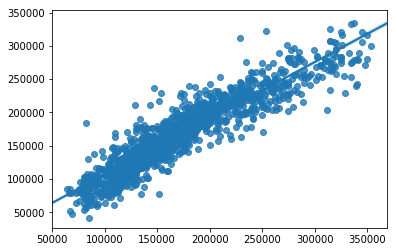

In [345]:
import seaborn as sns
predictions = cross_val_predict(model, x, y, cv=10)
sns.regplot(y, predictions)
#sns.regplot(y[y < 130000], predictions[y < 130000])
#sns.regplot(y[y >= 130000 & y < 255000], predictions[y >= 130000 & y < 255000])
#sns.regplot(y[y >= 255000], predictions[y >= 255000])
#sns.regplot(y, predictions, order = 2)

In [346]:
accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.8497645309681421


In [347]:
##Test Data
test = pd.read_csv("test.csv")

In [348]:
#Add important variables
test['TotalSF'] = (test['1stFlrSF'] + test['2ndFlrSF'] + test['TotalBsmtSF'])
test['Age'] = 2010 - test['YearBuilt']

In [349]:
#Turning Central Air to Numeric
CentralAir = test['CentralAir']
CentralAir_cat_encoded, CentralAir_Categories = CentralAir.factorize()
CentralAir_Num = pd.DataFrame(CentralAir_cat_encoded)
test['CentralAir'] =  CentralAir_Num

In [350]:
#Normalizing and Standardizing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.MinMaxScaler()
test['FullBath_Norm'] = scaler.fit_transform(test[["FullBath"]])
scaler = preprocessing.StandardScaler()
test['FullBath_Stand'] = scaler.fit_transform(test[["FullBath"]])

scaler = preprocessing.MinMaxScaler()
test['OverallQual_Norm'] = scaler.fit_transform(test[["OverallQual"]])
scaler = preprocessing.StandardScaler()
test['OverallQual_Stand'] = scaler.fit_transform(test[["OverallQual"]])

In [351]:
#Making dummy variables
#Sale Condition
test2 = test.copy()
SaleCondition_dummy = pd.get_dummies(test2['SaleCondition'])
SaleCondition_dummy = SaleCondition_dummy.drop(["Abnorml", "AdjLand", "Alloca", "Family", "Partial"], 1)
test2 = pd.concat([test2, SaleCondition_dummy], 1)
test = test2.copy()

#MSZoning
test3 = test.copy()
MSZoning_dummy = pd.get_dummies(test3['MSZoning'])
MSZoning_dummy = MSZoning_dummy.drop(["C (all)"], 1)
test3 = pd.concat([test3, MSZoning_dummy], 1)
test = test3.copy()

#Neighborhood
test4 = test.copy()
Neighborhood_dummy = pd.get_dummies(test4['Neighborhood'])
Neighborhood_dummy = Neighborhood_dummy.drop(["Blmngtn"], 1)
test4 = pd.concat([test4, Neighborhood_dummy], 1)
test = test4.copy()

#Exterior Quality
test5 = test.copy()
ExterQual_dummy = pd.get_dummies(test5['ExterQual'])
#Neighborhood_dummy = Neighborhood_dummy.drop([""], 1)
test5 = pd.concat([test5, ExterQual_dummy], 1)
test = test5.copy()

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1.}
test['KitchenQual_Num'] = (test['KitchenQual']).apply(conv_dict.get)
test['KitchenQual_Num'] = pd.to_numeric(test['KitchenQual_Num'])

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1.}
test['HeatingQC_Num'] = test['HeatingQC'].apply(conv_dict.get)
test['HeatingQC_Num'] = pd.to_numeric(test['HeatingQC_Num'])

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1., ' ':0}
test['ExterQual_Num'] = (test['ExterQual']).apply(conv_dict.get)

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1., ' ':0}
test['ExterCond_Num'] = (test['ExterCond']).apply(conv_dict.get)

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1., ' ':0}
test['BsmtCond_Num'] = (test['BsmtCond']).apply(conv_dict.get)

In [352]:
test['KitchenQual_Num'] = test['KitchenQual_Num'].fillna(3)
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0)
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(1)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)
test['BsmtCond_Num'] = test['BsmtCond_Num'].fillna(0)

In [353]:
## determination
print("The determination of lasso regression is: %.4f" %lasso.score(x, y))

The determination of lasso regression is: 0.8933


In [354]:
test['GarageArea'] = test['GarageArea'].fillna(0)
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(0)

In [355]:
test['TotalSF'] = test['TotalSF'].fillna(test['GrLivArea'])

In [356]:
## prediction
y_predict = lasso.predict(test[['OverallQual', 'YearRemodAdd', 'LotArea', 'CentralAir', 'BsmtFinSF1', 'HeatingQC_Num', 'Ex', 'Fa', 'Gd', 'TA', 'ExterCond_Num', 'KitchenQual_Num', 'BsmtCond_Num', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath_Norm', 'HalfBath', 'Age', 'TotRmsAbvGrd', 'GarageArea', 'Fireplaces', 'BsmtFullBath', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'Normal', 'FV', 'RH', 'RL', 'RM', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber']])

In [357]:
y_predict

array([123090.78869769, 169132.10289438, 180655.5361162 , ...,
       167231.23893579, 115212.94381943, 215243.91493806])

In [358]:
finalPredictions = pd.DataFrame({'Id':test['Id'], 'SalePrice':y_predict})

In [359]:
finalPredictions.to_csv('ALPSsubmit.csv', index = False)